In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
Data=pd.read_excel("bike.xlsx",sheet_name="Data")

In [7]:
Data.head()

,Row Labels,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,1,3,3,1,5,6,2,6,1,1,...,3,3,3,1,10,6,5,1,0,4
1,2,15,17,12,14,7,14,13,2,0,...,6,11,28,14,21,7,9,6,6,7
2,3,1,3,4,4,5,5,10,0,4,...,1,1,1,2,0,0,0,1,0,1
3,4,2,0,0,4,1,1,3,4,7,...,9,5,4,6,4,10,3,4,9,3
4,5,12,7,3,4,9,6,10,1,3,...,0,0,1,1,1,0,0,0,0,0


In [8]:
Data.isnull().values.any()

False

# Elbow Method

In [36]:
K=range(1,11)

np.random.seed(42)
sse={}
for k in K:
    cluster=KMeans(k)
    Data["cluster"]=cluster.fit_predict(Data)
    sse[k]=cluster.inertia_

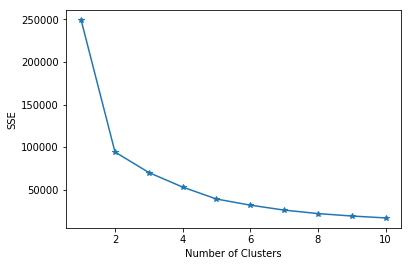

In [37]:
plt.plot(sse.keys(),sse.values(),marker="*")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Silhouette method

In [35]:
from sklearn.metrics import silhouette_score

np.random.seed(42)

sil_coef={}
for k in range (2,11): 
    cluster=KMeans(k)
    Data['cluster']=cluster.fit_predict(Data)
    sil_coef[k]=silhouette_score(Data,cluster.labels_,metric='euclidean')


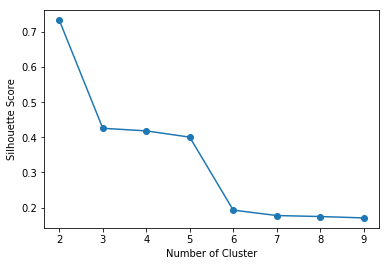

In [20]:
plt.plot(sil_coef.keys(),sil_coef.values(),marker='o') 
plt.xlabel("Number of Cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [31]:
cluster=KMeans(n_clusters=2)
Data["cluster"]=cluster.fit_predict(Data)

In [32]:
Data["cluster"].value_counts()

0    28
1     2
Name: cluster, dtype: int64

In [33]:
Data.head()

,Row Labels,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,cluster
0,1,3,3,1,5,6,2,6,1,1,...,3,3,1,10,6,5,1,0,4,0
1,2,15,17,12,14,7,14,13,2,0,...,11,28,14,21,7,9,6,6,7,0
2,3,1,3,4,4,5,5,10,0,4,...,1,1,2,0,0,0,1,0,1,0
3,4,2,0,0,4,1,1,3,4,7,...,5,4,6,4,10,3,4,9,3,0
4,5,12,7,3,4,9,6,10,1,3,...,0,1,1,1,0,0,0,0,0,0


In [34]:
Data.to_excel("Cluster.xlsx")